In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#for displaying the pipeline
from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings("ignore")

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
df=pd.read_excel("Flight Data.xlsx")

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Exploratory Data Analysis :-

In [5]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
df.shape

(10683, 11)

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [9]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [10]:
df["Additional_Info"].value_counts().values

array([8345, 1982,  320,   19,    7,    4,    3,    1,    1,    1],
      dtype=int64)

In [11]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [12]:
df.Arrival_Time.value_counts().sample

<bound method NDFrame.sample of 19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64>

In [13]:
df.Dep_Time.value_counts().sample

<bound method NDFrame.sample of 18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [16]:
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
df.notnull().sum()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [19]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [20]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [21]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])

In [22]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [23]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [24]:
# df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])

In [25]:
# df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [26]:
#df["Duration"]=pd.to_datetime(df["Duration"])

In [27]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [28]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [29]:
[features for features in df.columns if df[features].isnull().sum()>0]


['Route', 'Total_Stops']

In [30]:
#sns.heatmap(df.isnull(),yticklabels=True,cbar=False,cmap='viridis')

In [31]:
# df.loc[df['Additional_Info']=='No info' , 'Additional_Info'] = None
# #df.loc[df['Additional_Info']=='No Info' , 'Additional_Info'] = None

# df["Additional_Info"].tail(10)

In [32]:
df=df.replace({'Additional_Info' : { "No Info" : "No info"}})
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [33]:
df.tail(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10663,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 07 Jun,17h 5m,2 stops,In-flight meal not included,11733
10664,IndiGo,2019-09-04,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823
10665,IndiGo,2019-04-27,Kolkata,Banglore,CCU → BLR,15:15,17:45,2h 30m,non-stop,No info,4804
10666,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262
10667,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,21219
10669,Air India,2019-06-15,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10670,Air India,2019-12-05,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10671,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [34]:
df["Additional_Info"].isnull().sum()

0

In [35]:
df["Additional_Info"].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [36]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [37]:
df["Additional_Info"].describe()

count       10683
unique          9
top       No info
freq         8348
Name: Additional_Info, dtype: object

In [38]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [39]:
# df1["Additional_Info"]=df1["Additional_Info"].fillna("In-flight meal not included")
# df1["Additional_Info"].unique()

# Data Visualisation

In [40]:
#plt.plot(df1.Price,df1.Airline);   #line chart

In [41]:
# plt.figure(figsize = (15,8))
# sns.scatterplot(df1.Destination,df1.Price, hue=df1.Airline, s=200);


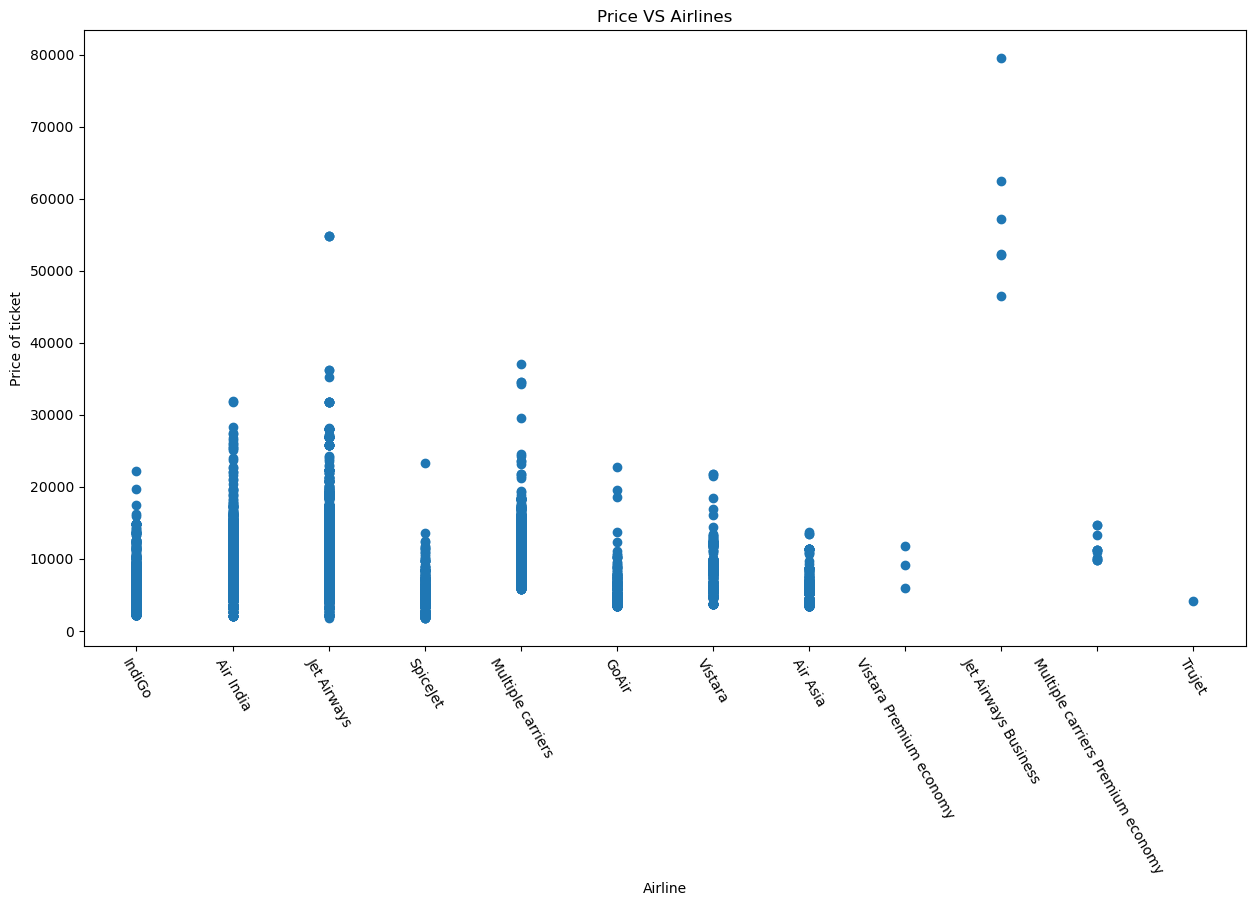

In [42]:
plt.figure(figsize = (15,8))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])    #scatter plot
# plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket');
plt.xticks(rotation = -60);

 ## Observation 
<font size=3>Jet Airways Business have the highest prices
while Truejet have among the lowest prices</font>

In [43]:
# plt.figure(figsize = (15,8))
# plt.plot(df1.Destination, df1.Duration)

# plt.xlabel('Destination')
# plt.ylabel('Duartion')

# plt.title("The Duration for each Destination");


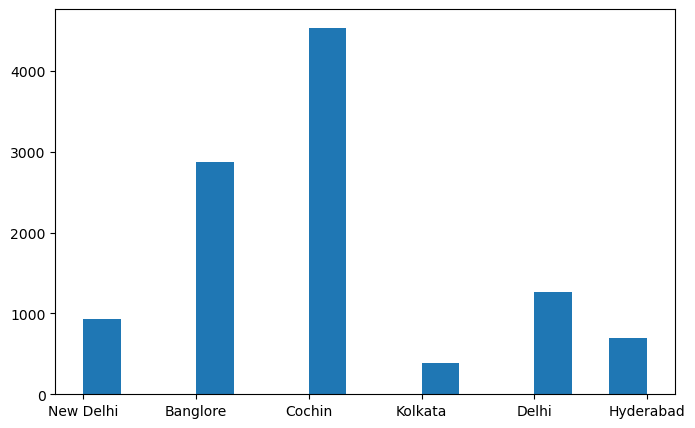

In [44]:
plt.figure(figsize = (8,5))
plt.hist(df.Destination, bins=15);

<span style="color:violet"><font size=4.5> Observation :</font></span><br><br>
<font size=3>Cochin is the most visited place while Kolkata is the least visited</font>

In [45]:
flight_names=df.Airline.value_counts().index
flight_names

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [46]:
flight=df.Airline.value_counts().values
flight

array([3849, 2053, 1752, 1196,  818,  479,  319,  194,   13,    6,    3,
          1], dtype=int64)

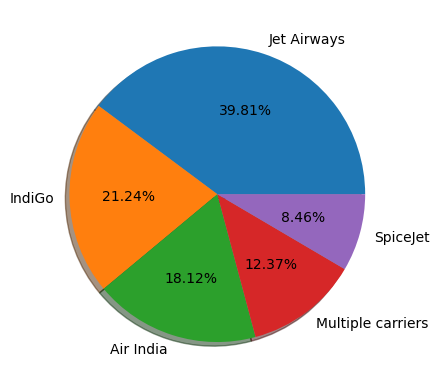

In [47]:
plt.pie(flight[:5],labels=flight_names[:5],autopct='%.2f%%', shadow=True);

## Observation
<font size=3>Jet Airways has the maximum no of flights across the country, followed by IndiGo and then Air India</font>

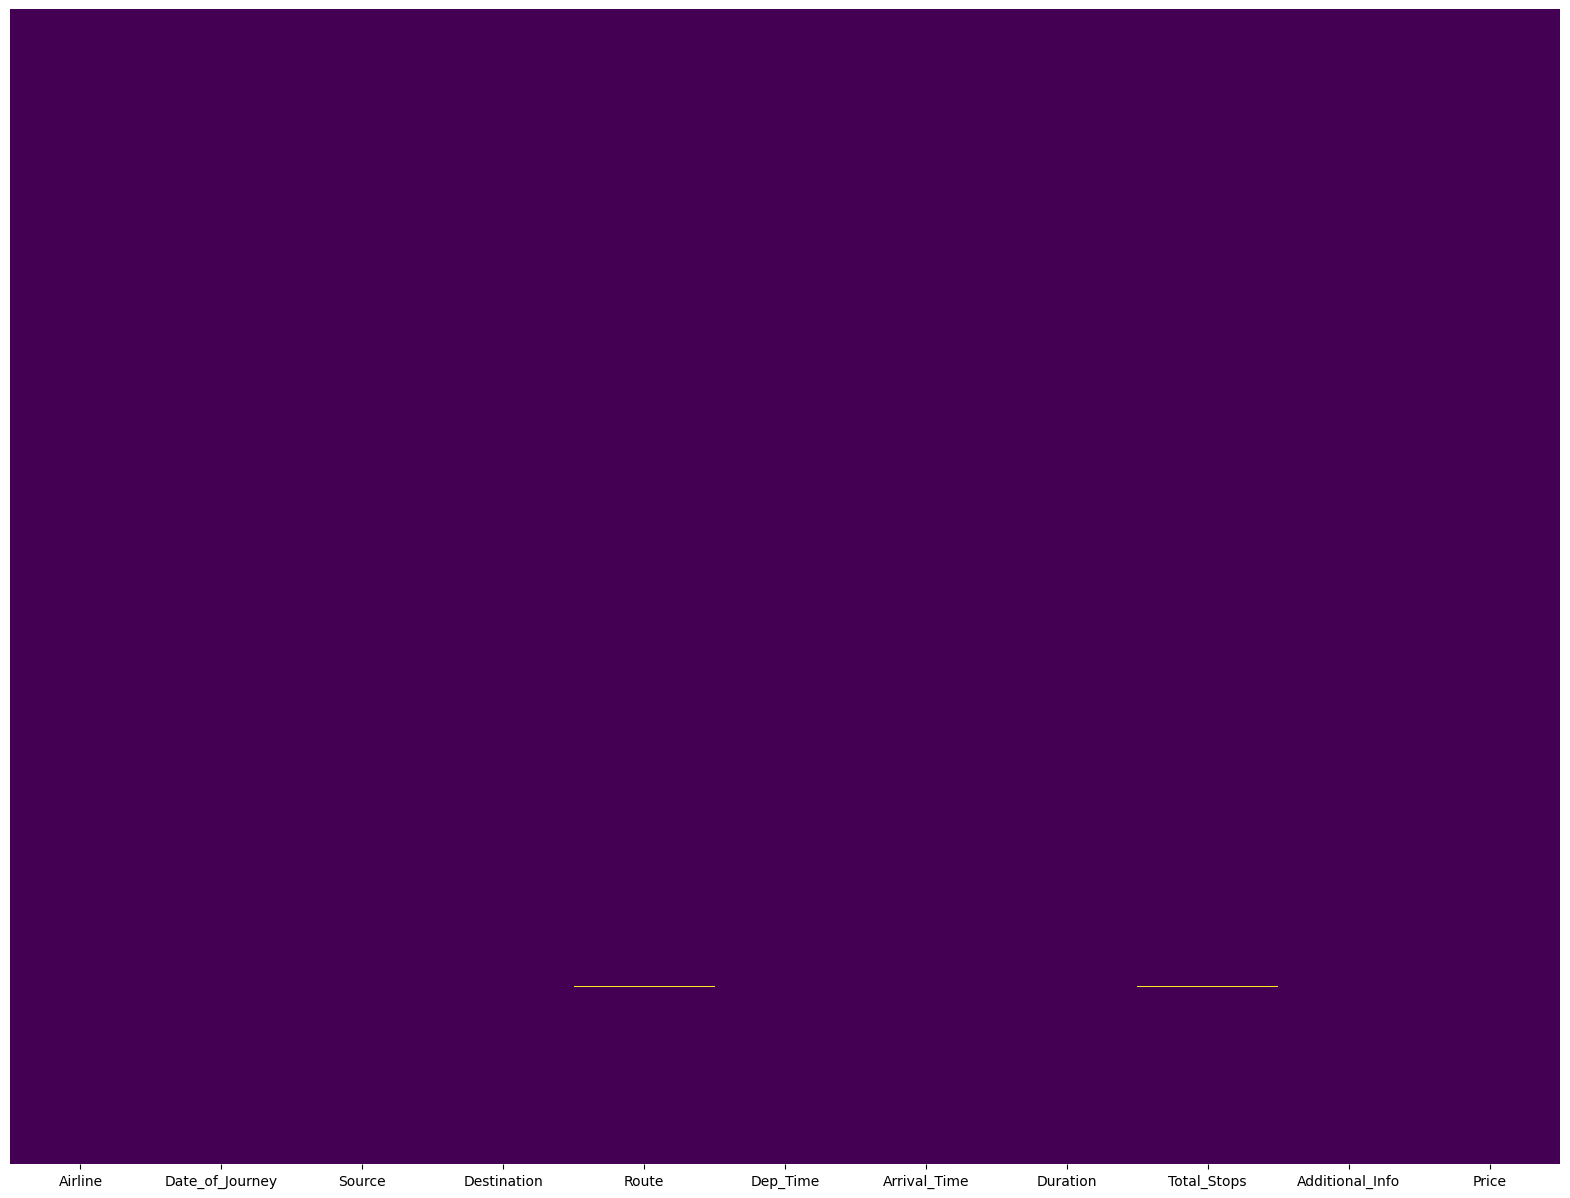

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# Handling the missing values :-

In [49]:
# df["Additional_Info"].value_counts()

In [50]:
# df.isnull().sum()

In [51]:
# df.replace({'Additional_Info' : {None : "In-flight meal not included"}}, inplace=True)
# df

In [52]:
# df["Additional_Info"].value_counts()

In [53]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [54]:
df.dropna(subset='Route', axis=0, inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<span style="color:yellow"><font size=5.5em><b> Feature Engineering:</b></font></span>

In [55]:
df["Journey_day"]=df["Date_of_Journey"].dt.day
df["Journey_month"]=df["Date_of_Journey"].dt.month
df["Journey_year"]=df["Date_of_Journey"].dt.year

In [56]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [57]:
df.drop("Date_of_Journey", axis=1 ,inplace=True)

In [58]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [59]:
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [60]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Journey_year                int64
dtype: object

In [61]:
df["Departure_hr"]=df["Dep_Time"].dt.hour.astype(int)
df["Departure_min"]=df["Dep_Time"].dt.minute.astype(int)
df["Arrival_hr"]=df["Arrival_Time"].dt.hour.astype(int)
df["Arrival_min"]=df["Arrival_Time"].dt.minute.astype(int)

In [62]:
df.drop("Dep_Time", axis=1 ,inplace=True)
df.drop("Arrival_Time", axis=1 ,inplace=True)

In [63]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [114]:
df["Journey_month"].describe()

count    10681.000000
mean         5.534688
std          2.987762
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         12.000000
Name: Journey_month, dtype: float64

In [64]:
df["Duration_hr"]=df["Duration"].str.split("h").str[0]
df["Duration_min"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [65]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40


In [66]:
df["Duration_hr"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [67]:
df.loc[df["Duration_hr"]=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,2019,16,50,16,55,5m,NaN


In [68]:
df[df["Duration_hr"]=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,2019,16,50,16,55,5m,NaN


In [69]:
df.drop(df[df["Duration_hr"]=='5m'].index,inplace=True)

In [70]:
df["Duration_hr"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [71]:
df["Duration_hr"]=df["Duration_hr"].astype(int)

In [72]:
df=df.replace({"Duration_min" : {np.nan :'0'}})

In [73]:
df["Duration_min"].isnull().values

array([False, False, False, ..., False, False, False])

In [74]:
df["Duration_min"]=df["Duration_min"].astype(int)

In [75]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Journey_year        int64
Departure_hr        int32
Departure_min       int32
Arrival_hr          int32
Arrival_min         int32
Duration_hr         int32
Duration_min        int32
dtype: object

In [76]:
df["Tot_Duration_in_mins"]=(df['Duration_hr']*60)+df['Duration_min']

In [77]:
df.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,Tot_Duration_in_mins
7018,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 20m,non-stop,No check-in baggage included,3841,6,9,2019,22,20,0,40,2,20,140
4546,Jet Airways,Delhi,Cochin,DEL → BOM → COK,25h 30m,1 stop,In-flight meal not included,10262,6,6,2019,17,30,19,0,25,30,1530
6243,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,11h 45m,1 stop,No info,13626,6,12,2019,6,30,18,15,11,45,705
3709,GoAir,Kolkata,Banglore,CCU → AMD → BLR,7h 35m,1 stop,No info,6484,5,1,2019,16,40,0,15,7,35,455
3221,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h 15m,1 stop,No info,4226,4,6,2019,6,15,10,30,4,15,255


In [78]:
df.drop("Duration_hr", axis=1 ,inplace=True)
df.drop("Duration_min", axis=1 ,inplace=True)
df.drop("Route", axis=1 ,inplace=True)

In [79]:
df.sample(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Tot_Duration_in_mins
1567,Air India,Delhi,Cochin,12h 45m,1 stop,No info,7480,27,6,2019,20,40,9,25,765
6379,Multiple carriers,Delhi,Cochin,15h 10m,1 stop,No info,12192,6,1,2019,3,50,19,0,910
984,Jet Airways,Banglore,New Delhi,17h 30m,1 stop,No info,17261,3,6,2019,16,55,10,25,1050


In [80]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [81]:
df=df.replace({'Total_Stops' : {'non-stop':'0'}})

In [82]:
df['Total_Stops']=df['Total_Stops'].str.split(" ").str[0]

In [83]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [84]:
df.dtypes

Airline                 object
Source                  object
Destination             object
Duration                object
Total_Stops              int32
Additional_Info         object
Price                    int64
Journey_day              int64
Journey_month            int64
Journey_year             int64
Departure_hr             int32
Departure_min            int32
Arrival_hr               int32
Arrival_min              int32
Tot_Duration_in_mins     int32
dtype: object

In [85]:
df.drop("Duration", axis=1 ,inplace=True)

In [86]:
df.sample(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Tot_Duration_in_mins
8153,Air India,Delhi,Cochin,3,No info,10703,5,9,2019,5,15,19,15,2280
2412,IndiGo,Banglore,Delhi,0,No info,3943,5,3,2019,4,0,6,50,170
7552,Multiple carriers,Delhi,Cochin,1,No info,12192,15,6,2019,7,0,19,0,720


<span style="color:yellow"><font size=5.5em><b>Data Visualisation :</b></font></span>

### Month of Journey Vs No of flights:

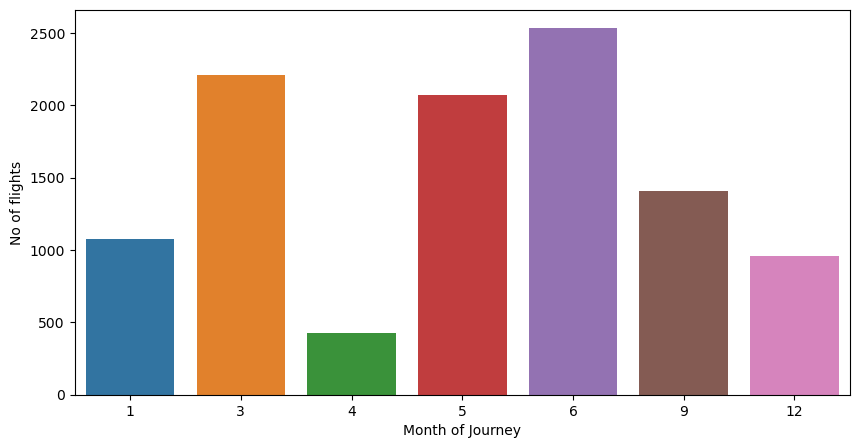

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Journey_month', data = df)
plt.xlabel("Month of Journey")
plt.ylabel("No of flights");

## Observation:
<font size=4>June sees the largest number of flights while April the least</font>

In [88]:
years=df["Journey_year"].unique()
print(years)

[2019]


### Month of Journey Vs Price

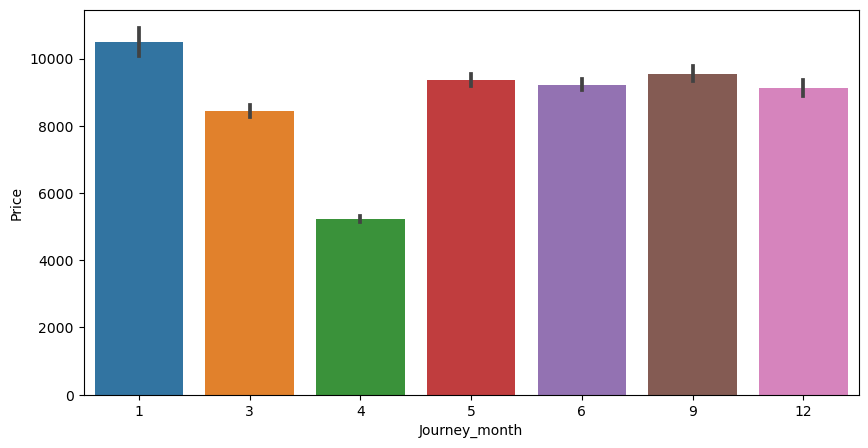

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(df["Journey_month"],df["Price"])
plt.show()

<span style="color:violet"><font size=5> Observation :</font></span><br><br>
<font size=4>Prices are highest in January, while they are the lowest in April</font>

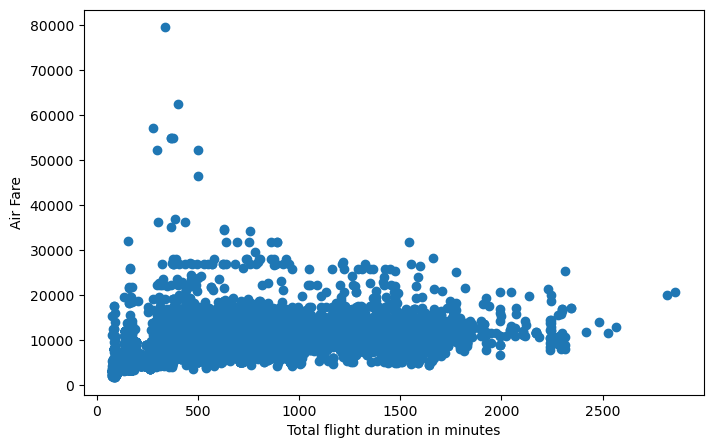

In [90]:
plt.figure(figsize=(8,5))
plt.scatter(df["Tot_Duration_in_mins"],df["Price"]);
plt.xlabel("Total flight duration in minutes")
plt.ylabel("Air Fare");

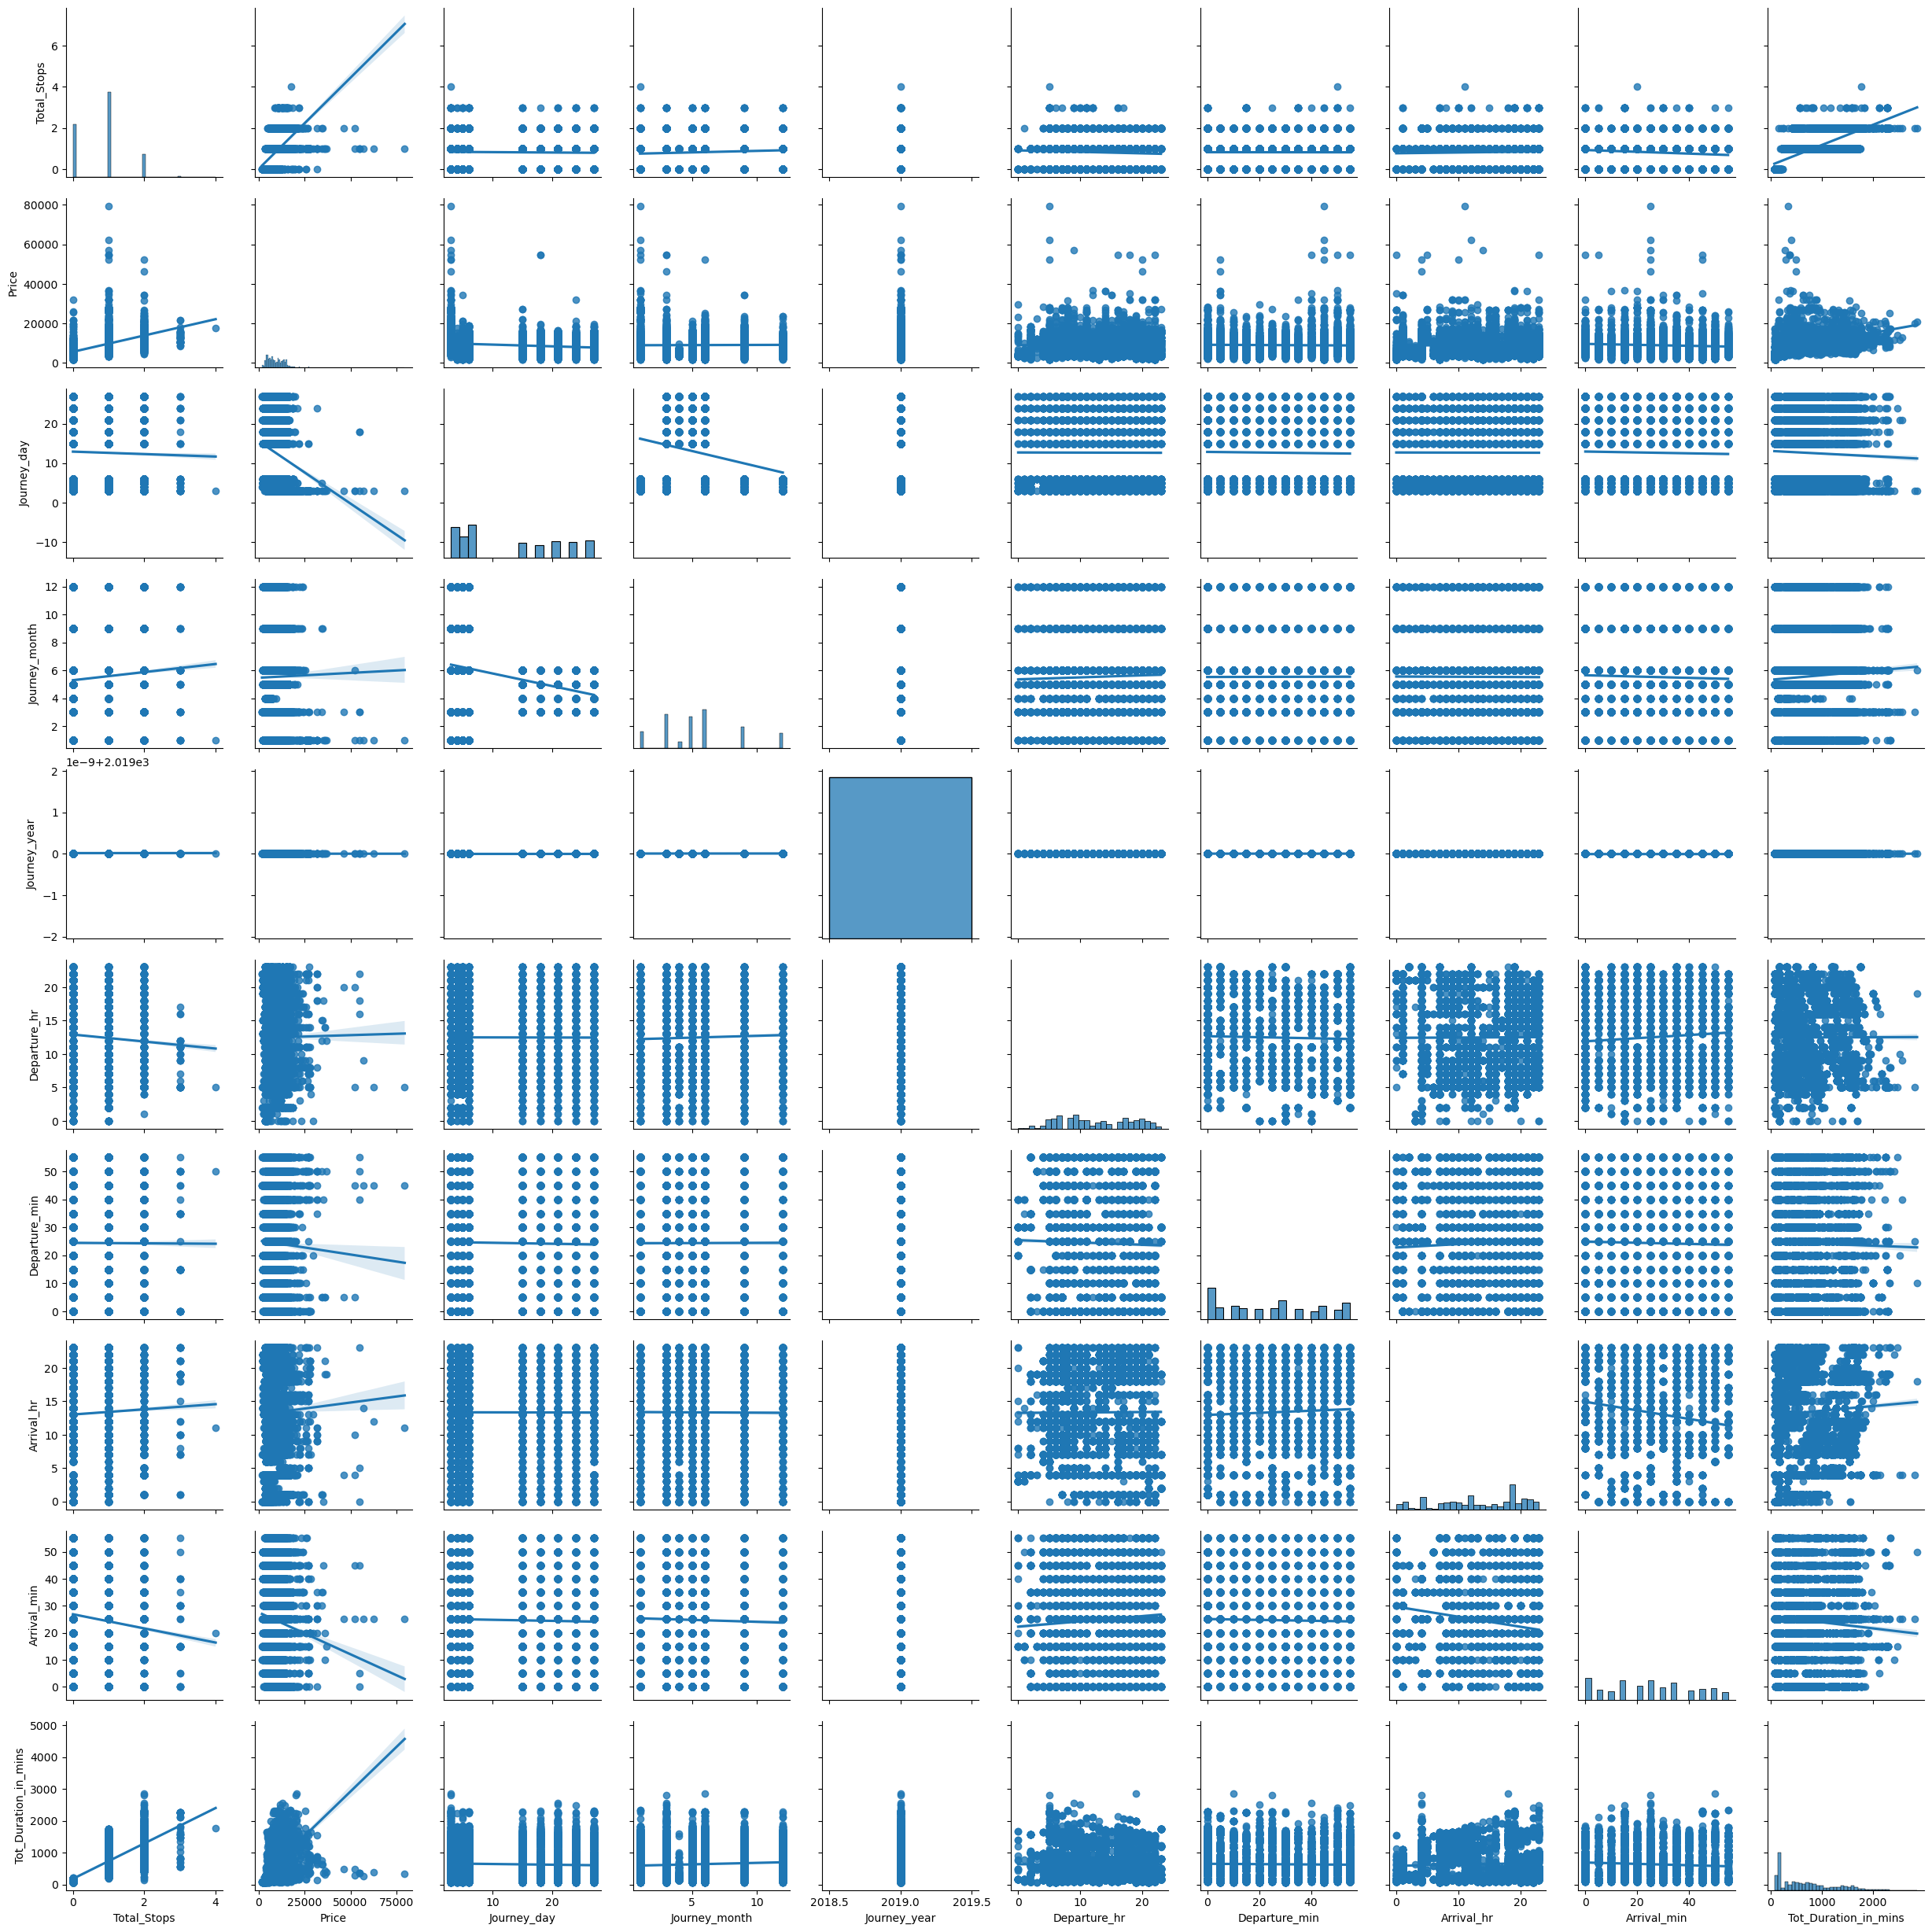

In [91]:
#plt.figure(figsize=(10,6))
sns.pairplot(df, kind="reg");

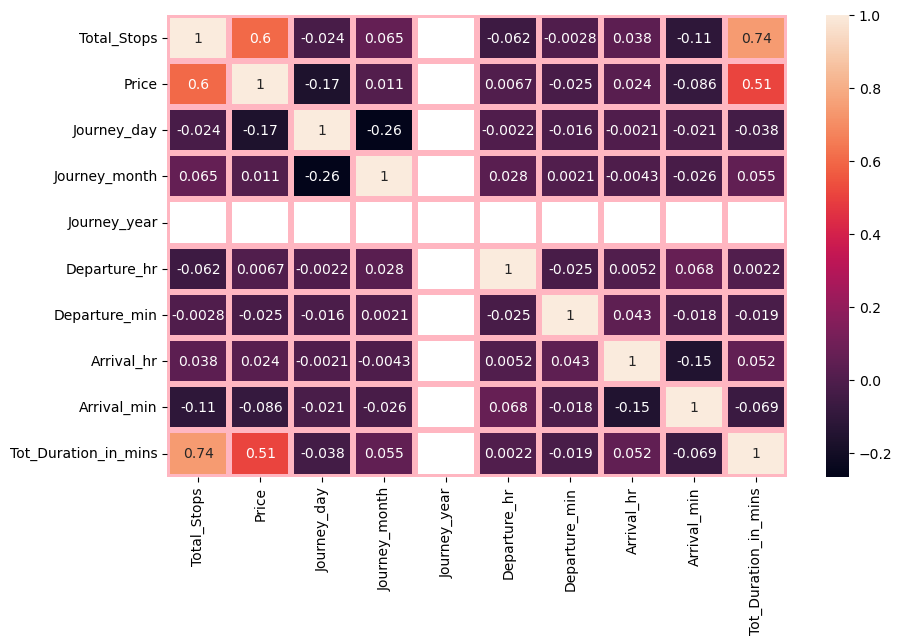

In [92]:
plt.figure(figsize=(10,6))
cor=df.corr()
sns.heatmap(cor,annot=True, linewidth=4, linecolor="lightpink");

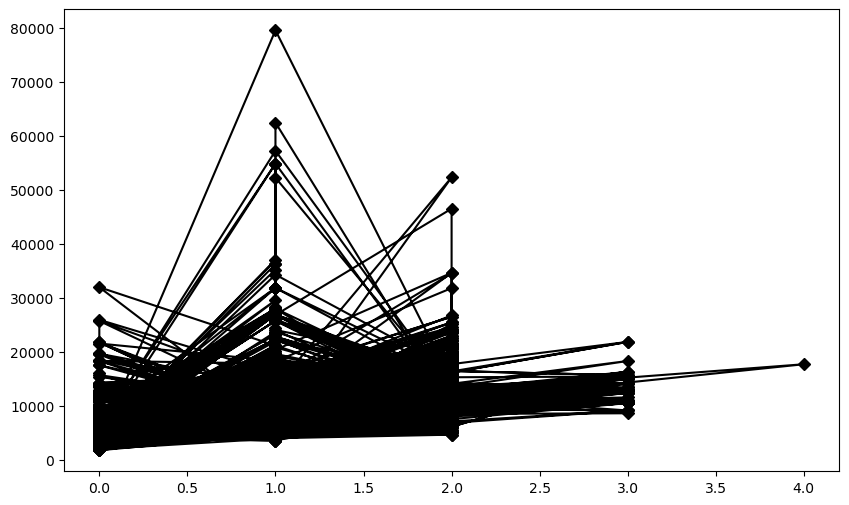

In [93]:
plt.figure(figsize=(10,6))
plt.plot(df['Total_Stops'], df['Price'], linestyle='-', marker='D', color="k");

<span style="color:violet"><font size=5> Observation :</font></span><br><br>
<font size=4>The trips with only one stop seems to have the highest range of prices</font>

## Data Distribution :

<AxesSubplot:xlabel='Price', ylabel='Density'>

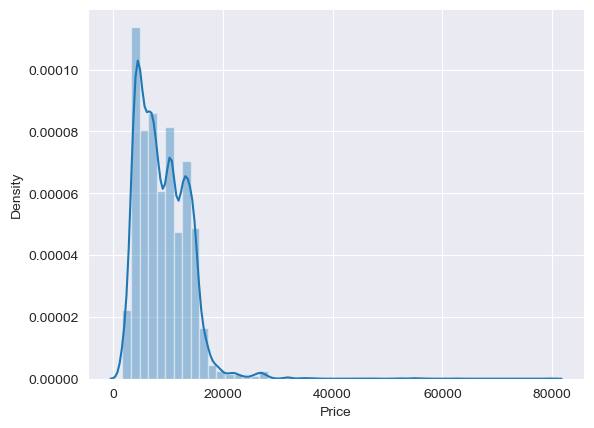

In [94]:
sns.set_style("darkgrid")
sns.distplot(df["Price"])

## Observation :
<font size=4><span style="color:red">The prices are not normally distributed. It is a skewed distribution.</span></font>

<br><span style="color:salmon"><font size=5>Outlier Detection :-</font></span><br>

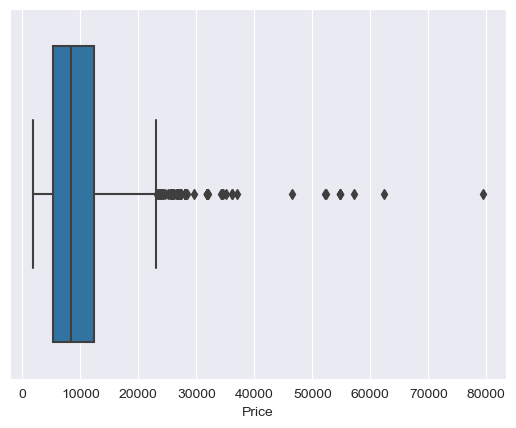

In [95]:
sns.boxplot(df.Price);

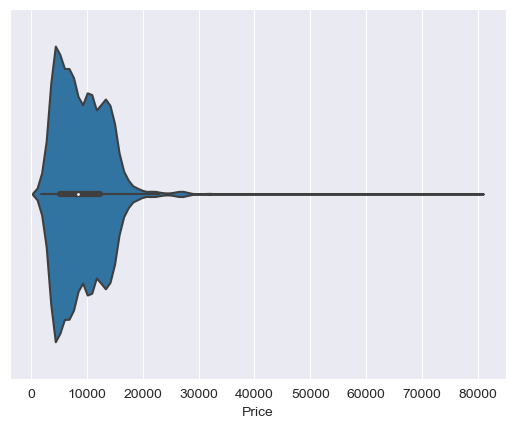

In [96]:
sns.violinplot(df.Price);

In [97]:
df.Price.describe()

count    10681.000000
mean      9086.443123
std       4611.075357
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## Splitting the dataset into train and test:

In [98]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["Price"]),df['Price'],test_size=0.2,random_state=42)

In [99]:
X_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Tot_Duration_in_mins
10611,Jet Airways,Mumbai,Hyderabad,0,In-flight meal not included,18,5,2019,7,5,8,30,85
1034,SpiceJet,Delhi,Cochin,1,No info,24,4,2019,15,45,22,5,380
8123,Jet Airways,Delhi,Cochin,1,In-flight meal not included,27,6,2019,2,15,12,35,620
4779,Jet Airways,Kolkata,Banglore,1,No info,4,1,2019,6,30,18,15,705
3207,IndiGo,Kolkata,Banglore,1,No info,24,5,2019,18,5,23,30,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Delhi,Cochin,1,No info,27,3,2019,9,0,4,25,1165
5191,Jet Airways,Kolkata,Banglore,1,In-flight meal not included,5,9,2019,14,5,20,45,400
5390,Multiple carriers,Delhi,Cochin,1,No info,15,5,2019,12,50,1,30,760
860,IndiGo,Banglore,New Delhi,0,No info,3,3,2019,0,40,3,25,165


In [100]:
y_train

10611     4050
1034      5583
8123     10262
4779     12681
3207      6218
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7271      5678
Name: Price, Length: 8544, dtype: int64

In [101]:
X_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Tot_Duration_in_mins
4830,IndiGo,Kolkata,Banglore,1,No info,24,3,2019,15,10,19,50,280
3771,Vistara,Kolkata,Banglore,1,No info,4,1,2019,7,10,18,50,700
1523,Jet Airways,Delhi,Cochin,1,In-flight meal not included,27,3,2019,19,15,19,45,1470
3393,Jet Airways,Delhi,Cochin,1,No info,21,5,2019,8,0,19,0,660
4169,Jet Airways,Banglore,Delhi,0,No info,6,12,2019,7,10,10,10,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,SpiceJet,Kolkata,Banglore,0,No info,3,6,2019,17,15,19,45,150
10063,Air Asia,Delhi,Cochin,1,No info,21,4,2019,7,55,22,25,870
6912,Air India,Delhi,Cochin,1,No info,6,12,2019,20,40,9,25,765
8617,Jet Airways,Kolkata,Banglore,1,No info,6,6,2019,17,0,23,35,395


In [102]:
y_test

4830      7476
3771      7927
1523      5963
3393     16289
4169      8016
         ...  
9871      4622
10063     7452
6912      7480
8617     14151
8989     14871
Name: Price, Length: 2137, dtype: int64

## Encoding the categorical features using OHE :

In [103]:
df.sample(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Tot_Duration_in_mins
10244,Jet Airways,Kolkata,Banglore,1,No info,13941,5,9,2019,8,25,16,20,475


In [104]:
trf=ColumnTransformer([('ohe_Airline_Source_Destination_Additional_Info',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,4])
],remainder='passthrough')

In [105]:
#creating pipeline
pipe = Pipeline([
    ('trf',trf)])

In [106]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Airline_Source_Destination_Additional_Info',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 4])]))])

## Exploring the pipeline:

In [107]:
pipe.named_steps

{'trf': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_Airline_Source_Destination_Additional_Info',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 2, 4])])}

In [108]:
pipe.named_steps['trf'].transformers_[0][1].feature_names_in_

array(['Airline', 'Source', 'Destination', 'Additional_Info'],
      dtype=object)

In [109]:
pipe.named_steps['trf'].transformers_[0][1].n_features_in_

4